In [2]:
%pylab inline
from pypdb import *

from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import biotite
import biotite.database.rcsb as rcsb

import pymol

import datetime


import support_functions
from support_functions import get_spike_ids

Populating the interactive namespace from numpy and matplotlib


/home/dstepanenko/anaconda3/envs/structure/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['repeat']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
pdb_ids = get_spike_ids()

Number of structures on 2022-3-23: 831
Number of structures with resolution less than or equal to 4.0: 170705
Number of structures with mass more than or equal to 400: 8304
Number of spike matches: 434
Selected PDB IDs:
6VSB 6VXX 6VYB 6WPS 6WPT 6X29 6X2A 6X2B 6X2C 6X6P 6X79 6XCM 6XCN 6XEY 6XF5 6XF6 6XKL 6XLU 6XM0 6XM3 6XM4 6XM5 6XR8 6XRA 6XS6 6Z43 6Z97 6ZB4 6ZB5 6ZDH 6ZGE 6ZGG 6ZGI 6ZHD 6ZOW 6ZOX 6ZOY 6ZOZ 6ZP0 6ZP1 6ZP5 6ZP7 6ZWV 6ZXN 7A25 7A29 7A4N 7A94 7AD1 7AKD 7B18 7BNM 7BNN 7BYR 7C2L 7CAB 7CAC 7CAI 7CAK 7CHH 7CN4 7CT5 7CWL 7CWM 7CWN 7CWS 7CWT 7CWU 7CYP 7CZP 7CZQ 7CZR 7CZS 7CZT 7CZU 7CZV 7CZW 7CZX 7CZY 7CZZ 7D00 7D03 7D0B 7D0C 7D0D 7DDD 7DF3 7DF4 7DK4 7DWY 7DWZ 7DX0 7DX1 7DX2 7DX3 7DX5 7DX6 7DX7 7DX8 7DX9 7DZW 7DZX 7DZY 7E3K 7E3L 7E5R 7E5S 7E7B 7E7D 7E8C 7E9O 7E9Q 7EAZ 7EB0 7EB3 7EB4 7EB5 7EDF 7EDG 7EDH 7EDI 7EDJ 7EH5 7EJ4 7EJ5 7FAE 7FAF 7FCD 7FCE 7FET 7JJI 7JV4 7JV6 7JVC 7JWB 7JWY 7JZL 7JZN 7K43 7K4N 7K8S 7K8T 7K8U 7K8V 7K8W 7K8X 7K8Z 7K90 7K9H 7K9J 7KDG 7KDH 7KDI 7KDJ 7KDK 7KDL 

In [4]:
all_dates = list()
for i in tqdm(pdb_ids):
    try:
        pdb_desc = pypdb.describe_pdb(i)
        depdate = pdb_desc['rcsb_accession_info']['deposit_date']
        print (i, depdate)
        all_dates.append(depdate)
    except AttributeError:
        print(i, ' some error')
    

  0%|          | 0/434 [00:00<?, ?it/s]

6VSB 2020-02-10T00:00:00+0000
6VXX 2020-02-25T00:00:00+0000
6VYB 2020-02-25T00:00:00+0000
6WPS 2020-04-27T00:00:00+0000
6WPT 2020-04-27T00:00:00+0000
6X29 2020-05-20T00:00:00+0000
6X2A 2020-05-20T00:00:00+0000
6X2B 2020-05-20T00:00:00+0000
6X2C 2020-05-20T00:00:00+0000
6X6P 2020-05-28T00:00:00+0000
6X79 2020-05-29T00:00:00+0000
6XCM 2020-06-08T00:00:00+0000
6XCN 2020-06-08T00:00:00+0000
6XEY 2020-06-14T00:00:00+0000
6XF5 2020-06-15T00:00:00+0000
6XF6 2020-06-15T00:00:00+0000
6XKL 2020-06-26T00:00:00+0000
6XLU 2020-06-29T00:00:00+0000
6XM0 2020-06-29T00:00:00+0000
6XM3 2020-06-29T00:00:00+0000
6XM4 2020-06-29T00:00:00+0000
6XM5 2020-06-29T00:00:00+0000
6XR8 2020-07-11T00:00:00+0000
6XRA 2020-07-11T00:00:00+0000
6XS6 2020-07-15T00:00:00+0000
6Z43 2020-05-22T00:00:00+0000
6Z97 2020-06-03T00:00:00+0000
6ZB4 2020-06-06T00:00:00+0000
6ZB5 2020-06-07T00:00:00+0000
6ZDH 2020-06-14T00:00:00+0000
6ZGE 2020-06-18T00:00:00+0000
6ZGG 2020-06-18T00:00:00+0000
6ZGI 2020-06-18T00:00:00+0000
6ZHD 2020-

/home/dstepanenko/anaconda3/envs/structure/lib/python3.9/site-packages/pypdb/util/http_requests.py:55: UserWarning: Too many requests, waiting 0.5 s
  warnings.warn("Too many requests, waiting " + str(curr_sleep) + " s")
/home/dstepanenko/anaconda3/envs/structure/lib/python3.9/site-packages/pypdb/util/http_requests.py:55: UserWarning: Too many requests, waiting 1.0 s
  warnings.warn("Too many requests, waiting " + str(curr_sleep) + " s")
/home/dstepanenko/anaconda3/envs/structure/lib/python3.9/site-packages/pypdb/util/http_requests.py:55: UserWarning: Too many requests, waiting 1.5 s
  warnings.warn("Too many requests, waiting " + str(curr_sleep) + " s")
/home/dstepanenko/anaconda3/envs/structure/lib/python3.9/site-packages/pypdb/util/http_requests.py:55: UserWarning: Too many requests, waiting 2.0 s
  warnings.warn("Too many requests, waiting " + str(curr_sleep) + " s")
/home/dstepanenko/anaconda3/envs/structure/lib/python3.9/site-packages/pypdb/util/http_requests.py:61: UserWarning: 

7DZW  some error
7DZX 2021-01-26T00:00:00+0000
7DZY 2021-01-26T00:00:00+0000
7E3K 2021-02-09T00:00:00+0000
7E3L 2021-02-09T00:00:00+0000
7E5R 2021-02-20T00:00:00+0000
7E5S 2021-02-20T00:00:00+0000
7E7B 2021-02-25T00:00:00+0000
7E7D 2021-02-25T00:00:00+0000
7E8C 2021-03-01T00:00:00+0000
7E9O 2021-03-04T00:00:00+0000
7E9Q 2021-03-04T00:00:00+0000
7EAZ 2021-03-08T00:00:00+0000
7EB0 2021-03-08T00:00:00+0000
7EB3 2021-03-08T00:00:00+0000
7EB4 2021-03-08T00:00:00+0000
7EB5 2021-03-08T00:00:00+0000
7EDF 2021-03-16T00:00:00+0000
7EDG 2021-03-16T00:00:00+0000
7EDH 2021-03-16T00:00:00+0000
7EDI 2021-03-16T00:00:00+0000
7EDJ 2021-03-16T00:00:00+0000
7EH5 2021-03-28T00:00:00+0000
7EJ4 2021-04-01T00:00:00+0000
7EJ5 2021-04-01T00:00:00+0000
7FAE 2021-07-06T00:00:00+0000
7FAF 2021-07-06T00:00:00+0000
7FCD 2021-07-14T00:00:00+0000
7FCE 2021-07-14T00:00:00+0000
7FET 2021-07-21T00:00:00+0000
7JJI 2020-07-26T00:00:00+0000
7JV4 2020-08-20T00:00:00+0000
7JV6 2020-08-20T00:00:00+0000
7JVC 2020-08-20T00:00:0

7V7S 2021-08-21T00:00:00+0000
7V7T 2021-08-21T00:00:00+0000
7V7U 2021-08-21T00:00:00+0000
7V7V 2021-08-21T00:00:00+0000
7V7Z 2021-08-22T00:00:00+0000
7V81 2021-08-22T00:00:00+0000
7V82 2021-08-22T00:00:00+0000
7V83 2021-08-22T00:00:00+0000
7V85 2021-08-22T00:00:00+0000
7V86 2021-08-22T00:00:00+0000
7V88 2021-08-22T00:00:00+0000
7V89 2021-08-22T00:00:00+0000
7V8A 2021-08-22T00:00:00+0000
7V8C 2021-08-22T00:00:00+0000
7VNC 2021-10-10T00:00:00+0000
7VND 2021-10-10T00:00:00+0000
7VNE 2021-10-10T00:00:00+0000
7VX1 2021-11-12T00:00:00+0000
7VX9 2021-11-12T00:00:00+0000
7VXA 2021-11-12T00:00:00+0000
7VXB 2021-11-12T00:00:00+0000
7VXC 2021-11-12T00:00:00+0000
7VXD 2021-11-12T00:00:00+0000
7VXE 2021-11-12T00:00:00+0000
7VXF 2021-11-12T00:00:00+0000
7VXI 2021-11-12T00:00:00+0000
7VXK 2021-11-12T00:00:00+0000
7VXM 2021-11-12T00:00:00+0000
7W92 2021-12-09T00:00:00+0000
7W94 2021-12-09T00:00:00+0000
7W98 2021-12-09T00:00:00+0000
7W99 2021-12-09T00:00:00+0000
7W9B 2021-12-09T00:00:00+0000
7W9C 2021-

/tmp/ipykernel_75444/3091734366.py:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  plt.hist(np.array(all_dates).astype("datetime64"), bins = 30, color = "skyblue", edgecolor = 'white')


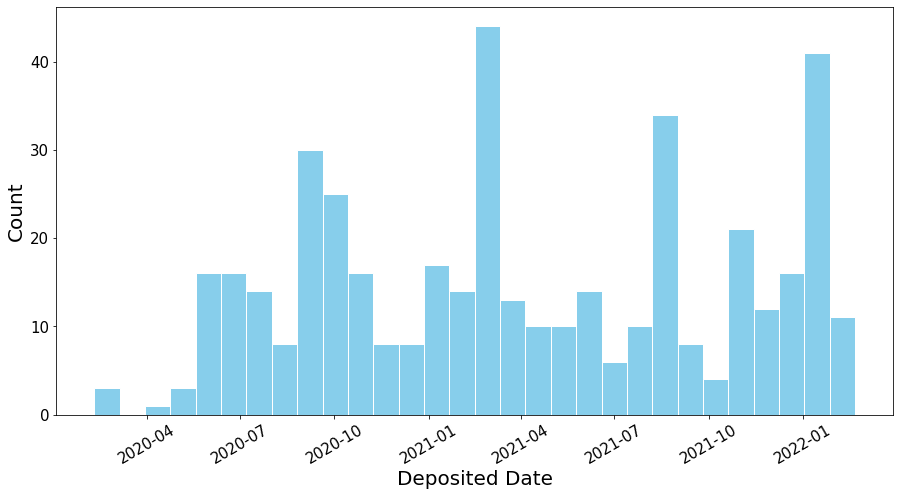

In [5]:
import seaborn as sns
fig = plt.figure(figsize=(15,7.5))
plt.hist(np.array(all_dates).astype("datetime64"), bins = 30, color = "skyblue", edgecolor = 'white')
plt.xlabel("Deposited Date", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=30, fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('deposited_date.png', bbox_inches='tight')